# Jammu & Kashmir Tourism Data Analysis and Revenue Prediction
This project analyzes tourism data from Jammu & Kashmir and uses machine learning to predict future revenue based on visitor statistics.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Load the dataset
df = pd.read_csv(r"C:\Users\rizwan\Downloads\jk_tourism_filtered_with_total.csv")
df.head()

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists
0,2014,January,Srinagar,13266,4393,119046000,3.2,17659
1,2014,January,Gulmarg,21377,2235,133705000,3.6,23612
2,2014,January,Pahalgam,8755,1634,63383000,3.5,10389
3,2014,January,Leh,20053,2704,132713000,3.2,22757
4,2014,January,Sonamarg,14880,2276,101712000,2.3,17156


In [57]:
# Total Visitors
df['Total_Visitors'] = df['Domestic_Visitors'] + df['Foreign_Visitors']

# Revenue per Visitor
df['Revenue_per_Visitor'] = df['Revenue_INR'] / df['Total_Visitors']

# Foreign Ratio
df['Foreign_Ratio'] = df['Foreign_Visitors'] / df['Total_Visitors']

# Total Tourist Days
df['Total_Tourist_Days'] = df['Total_Visitors'] * df['Avg_Stay_Days']
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days
0,2014,January,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8
1,2014,January,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2
2,2014,January,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5
3,2014,January,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4
4,2014,January,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,December,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0
1976,2024,December,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0
1977,2024,December,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4
1978,2024,December,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0


In [59]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days
0,2014,1,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8
1,2014,1,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2
2,2014,1,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5
3,2014,1,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4
4,2014,1,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,12,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0
1976,2024,12,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0
1977,2024,12,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4
1978,2024,12,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0


In [61]:
# Add Season Column based on Month
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(assign_season)

In [63]:
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,1,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,1,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,1,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,1,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,1,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,12,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,12,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,12,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,12,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [65]:
# Explore the dataset
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1980 non-null   int64  
 1   Month                1980 non-null   int32  
 2   Destination          1980 non-null   object 
 3   Domestic_Visitors    1980 non-null   int64  
 4   Foreign_Visitors     1980 non-null   int64  
 5   Revenue_INR          1980 non-null   int64  
 6   Avg_Stay_Days        1980 non-null   float64
 7   Total_Tourists       1980 non-null   int64  
 8   Total_Visitors       1980 non-null   int64  
 9   Revenue_per_Visitor  1980 non-null   float64
 10  Foreign_Ratio        1980 non-null   float64
 11  Total_Tourist_Days   1980 non-null   float64
 12  Season               1980 non-null   object 
dtypes: float64(4), int32(1), int64(6), object(2)
memory usage: 193.5+ KB


Year                   0
Month                  0
Destination            0
Domestic_Visitors      0
Foreign_Visitors       0
Revenue_INR            0
Avg_Stay_Days          0
Total_Tourists         0
Total_Visitors         0
Revenue_per_Visitor    0
Foreign_Ratio          0
Total_Tourist_Days     0
Season                 0
dtype: int64

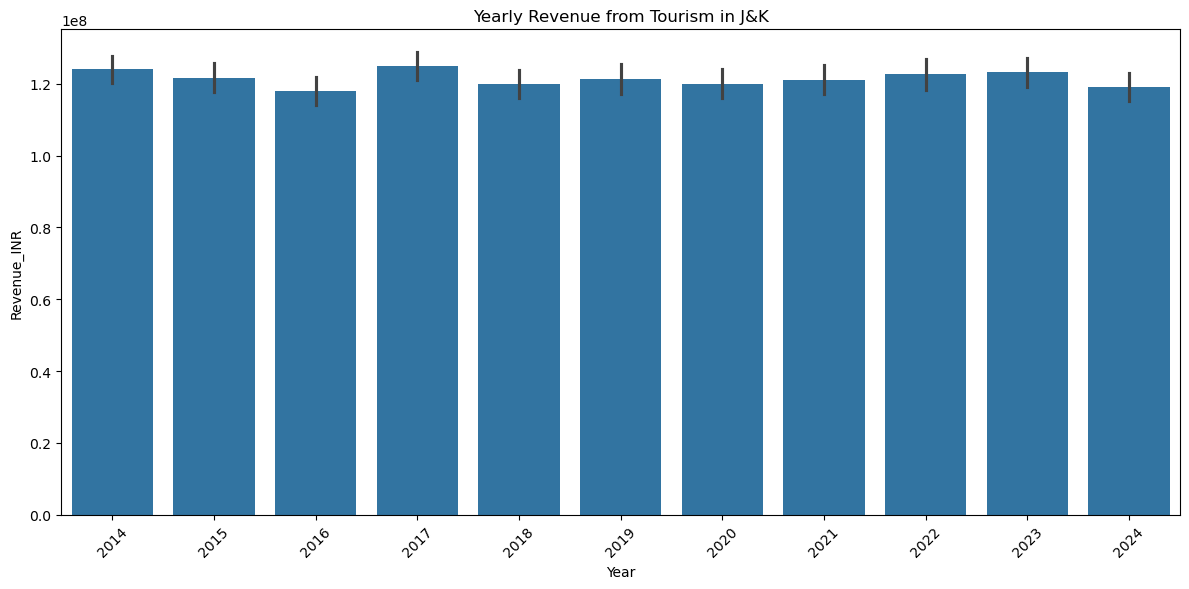

In [67]:
# Visualize revenue trends over the years
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Revenue_INR', data=df)
plt.title('Yearly Revenue from Tourism in J&K')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

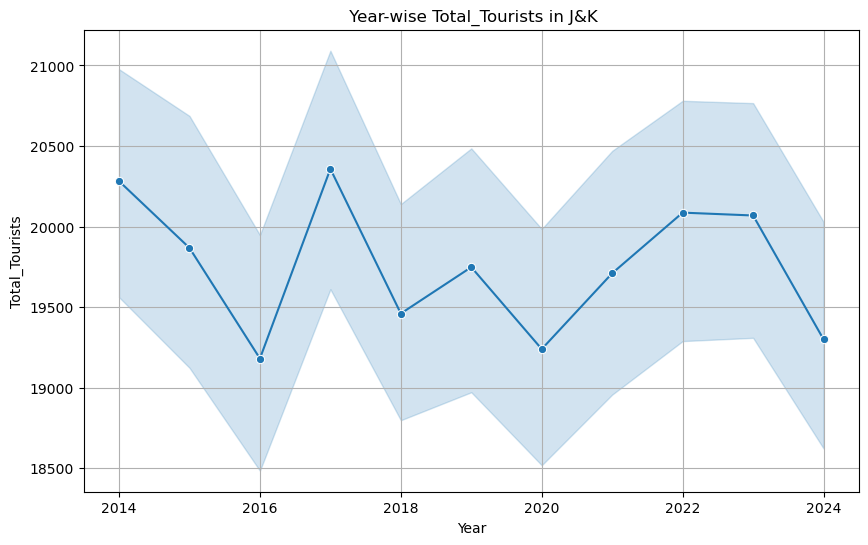

In [68]:
#Year-wise Total_Tourists in J&K
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Total_Tourists', marker='o')
plt.title(" Year-wise Total_Tourists in J&K")
plt.ylabel("Total_Tourists")
plt.grid(True)
plt.show()


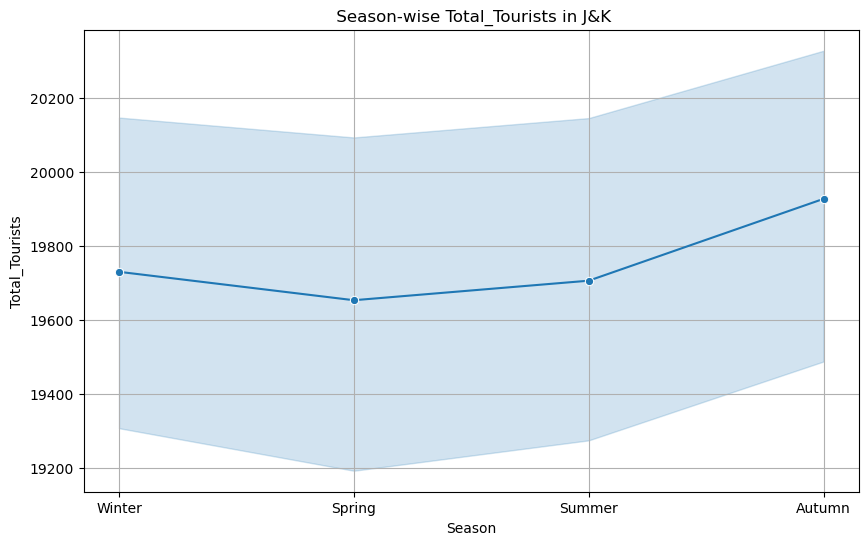

In [71]:
#Season-wise Total_Tourists in J&K
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Season', y='Total_Tourists', marker='o')
plt.title(" Season-wise Total_Tourists in J&K")
plt.ylabel("Total_Tourists")
plt.grid(True)
plt.show()

C:\Users\rizwan\AppData\Local\Temp\ipykernel_8836\1606198608.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Destination', y='Total_Tourists', estimator=sum, ci=None)


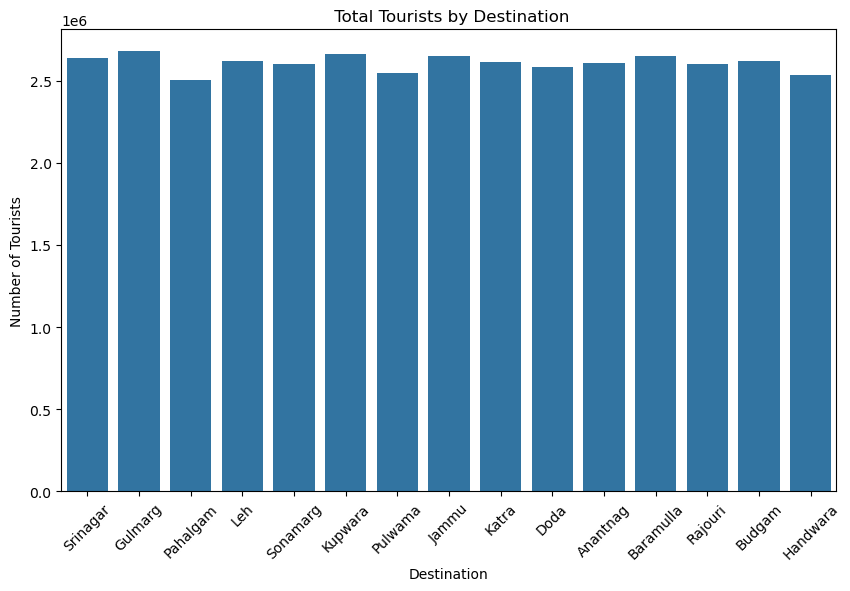

In [73]:
#Total_Tourists by Distination in J&K
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Destination', y='Total_Tourists', estimator=sum, ci=None)
plt.title(" Total Tourists by Destination")
plt.ylabel("Number of Tourists")
plt.xticks(rotation=45)
plt.show()

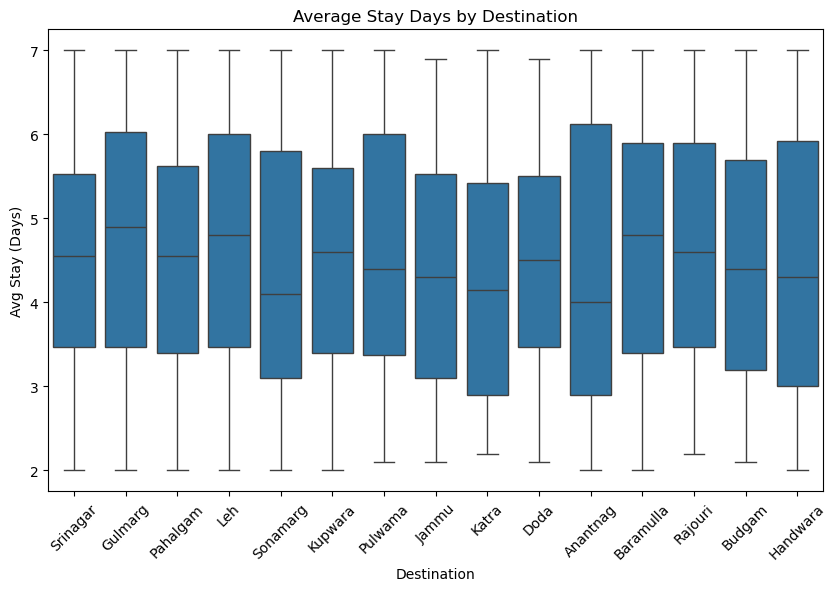

In [75]:
#Average stay days by distination
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Destination', y='Avg_Stay_Days')
plt.title("Average Stay Days by Destination")
plt.ylabel("Avg Stay (Days)")
plt.xticks(rotation=45)
plt.show()

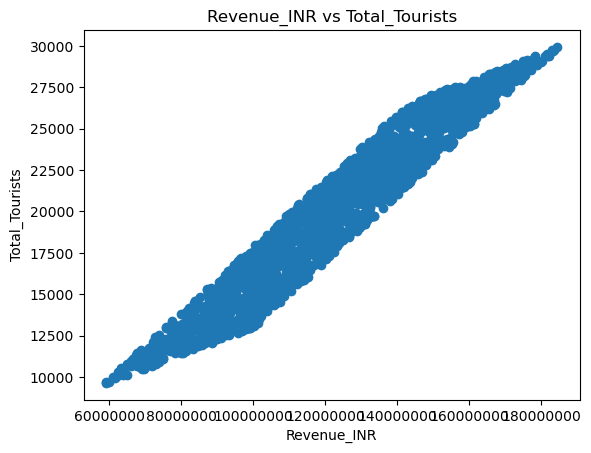

In [77]:
import matplotlib.pyplot as plt 
plt.ticklabel_format(axis="x",style="plain")
plt.ticklabel_format(axis="y",style="plain")
plt.scatter(df["Revenue_INR"],df["Total_Tourists"])
plt.xlabel("Revenue_INR")
plt.ylabel("Total_Tourists")
plt.title("Revenue_INR vs Total_Tourists")
plt.show()

In [79]:
print(df["Destination"].value_counts())

Destination
Srinagar     132
Gulmarg      132
Pahalgam     132
Leh          132
Sonamarg     132
Kupwara      132
Pulwama      132
Jammu        132
Katra        132
Doda         132
Anantnag     132
Baramulla    132
Rajouri      132
Budgam       132
Handwara     132
Name: count, dtype: int64


In [123]:
print(df["Season"].value_counts())

Season
Winter    495
Spring    495
Summer    495
Autumn    495
Name: count, dtype: int64


In [121]:
numaric=df[['Domestic_Visitors','Foreign_Visitors','Revenue_INR','Avg_Stay_Days','Total_Tourists','Total_Visitors','Revenue_per_Visitor','Foreign_Ratio',	'Total_Tourist_Days']]
categorical=df[["Destination","Month","Season"]]

In [125]:
categorical["Destination"]=categorical["Destination"].replace({"Srinagar":0,"Gulmarg":1,"Pahalgam":2,"Leh":3,"Sonamarg":4,"Kupwara":5,"Pulwama":6,"Jammu":7
                                                              ,"Katra":8,"Doda":9,"Anantnag":10,"Baramulla":11,"Rajouri":12,"Budgam":13,"Handwara":14})
categorical["Season"]=categorical["Season"].replace({"Winter":1,"Spring":2,"Summer":3,"Autumn":4})

C:\Users\rizwan\AppData\Local\Temp\ipykernel_8836\3876461711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical["Destination"]=categorical["Destination"].replace({"Srinagar":0,"Gulmarg":1,"Pahalgam":2,"Leh":3,"Sonamarg":4,"Kupwara":5,"Pulwama":6,"Jammu":7
C:\Users\rizwan\AppData\Local\Temp\ipykernel_8836\3876461711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical["Destination"]=categorical["Destination"].replace({"Srinagar":0,"Gulmarg":1,"Pahalgam":2,"Leh":3,"Sonamarg":4,"Kupwara":5,"Pulwama

In [127]:
categorical

,Destination,Month,Season
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
1975,10,12,1
1976,11,12,1
1977,12,12,1
1978,13,12,1


In [129]:
#pearson corelation test we use this because dependant and independant are both numaric
x=numaric.corr()
print(x)

                     Domestic_Visitors  Foreign_Visitors  Revenue_INR  \
Domestic_Visitors             1.000000         -0.002113     0.895839   
Foreign_Visitors             -0.002113          1.000000     0.442484   
Revenue_INR                   0.895839          0.442484     1.000000   
Avg_Stay_Days                 0.036513         -0.043467     0.013428   
Total_Tourists                0.979326          0.200219     0.967212   
Total_Visitors                0.979326          0.200219     0.967212   
Revenue_per_Visitor          -0.690040          0.690566    -0.311940   
Foreign_Ratio                -0.690040          0.690566    -0.311940   
Total_Tourist_Days            0.615251          0.092894     0.593024   

                     Avg_Stay_Days  Total_Tourists  Total_Visitors  \
Domestic_Visitors         0.036513        0.979326        0.979326   
Foreign_Visitors         -0.043467        0.200219        0.200219   
Revenue_INR               0.013428        0.967212        0

<Axes: >

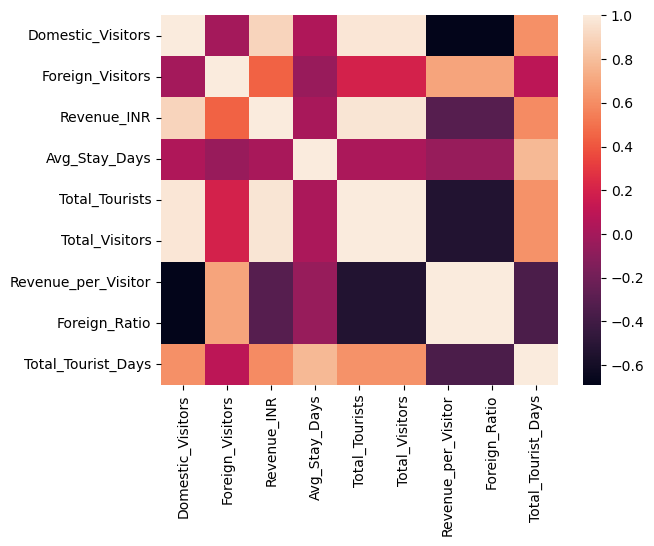

In [131]:
import seaborn
seaborn.heatmap(x)

**After analysing this heatmap the stron relacationship is**
**Total_Tourists ↔ Total_Visitors → nearly 1.0**

**Total_Visitors ↔ Total_Tourist_Days**

**Revenue_INR ↔ Domestic_Visitors**

**Total_Tourists ↔ Total_Tourist_Days**

In [178]:
print(df["Revenue_per_Visitor"].skew())

0.6411738516678662


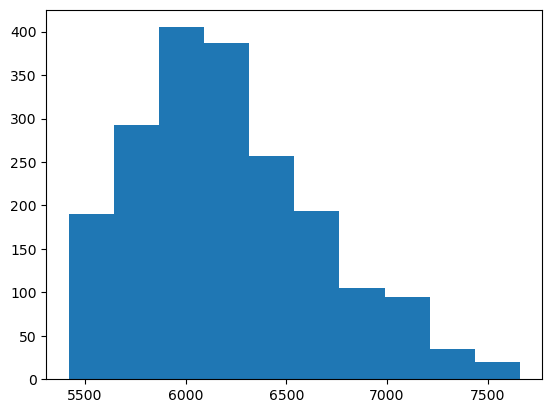

In [176]:
plt.hist(df["Revenue_per_Visitor"])
plt.show()

In [182]:
#ANOVA----------> analysis of virance
from sklearn.feature_selection import f_classif,SelectKBest
select=SelectKBest(f_classif,k=3)
column=select.fit_transform(categorical,numaric["Revenue_INR"])
selected=select.get_support(indices=True)
print(selected)
print(categorical.columns)
print(select.scores_)

[0 1 2]
Index(['Destination', 'Month', 'Season'], dtype='object')
[1.08934206 0.80139492 0.74006696]


In [184]:
print(df.dtypes)

Year                     int64
Month                    int32
Destination             object
Domestic_Visitors        int64
Foreign_Visitors         int64
Revenue_INR              int64
Avg_Stay_Days          float64
Total_Tourists           int64
Total_Visitors           int64
Revenue_per_Visitor    float64
Foreign_Ratio          float64
Total_Tourist_Days     float64
Season                  object
dtype: object


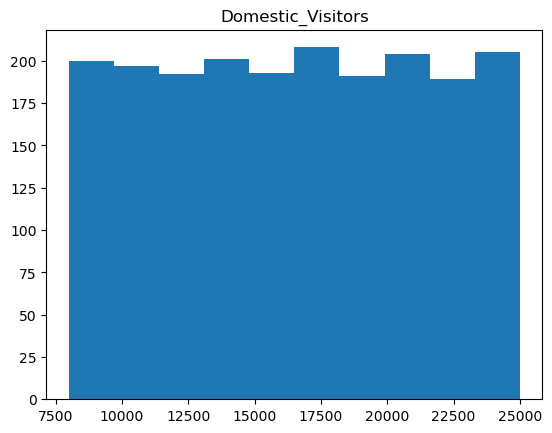

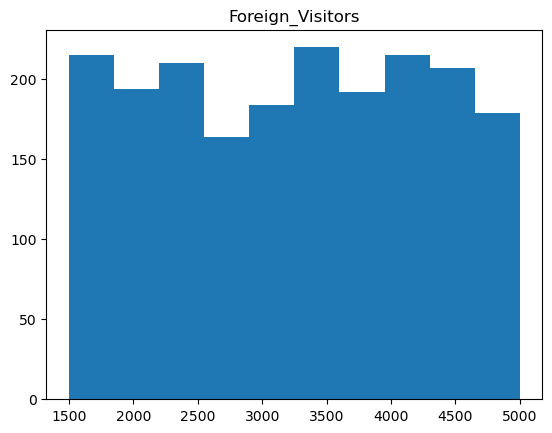

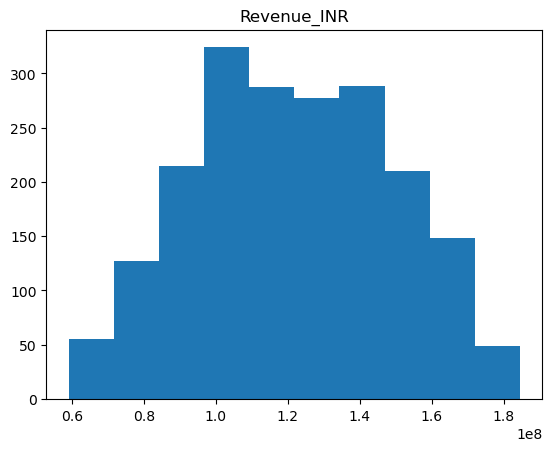

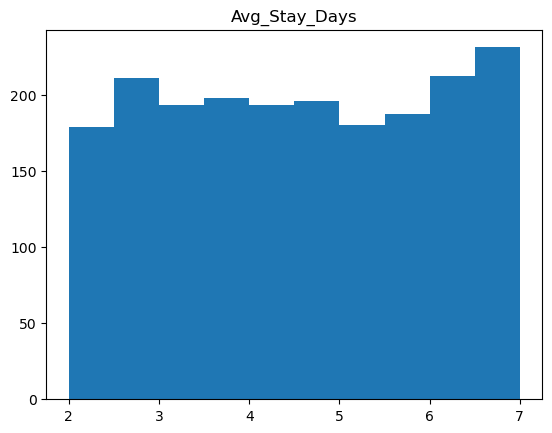

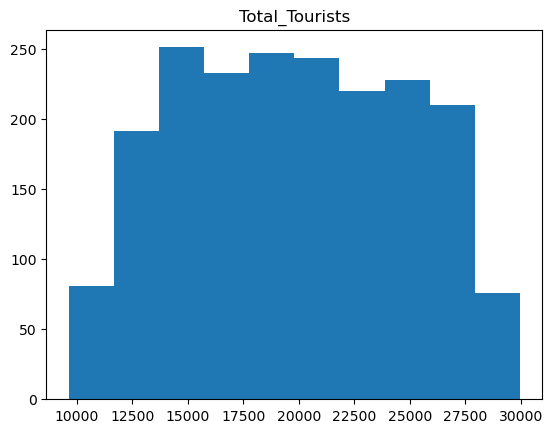

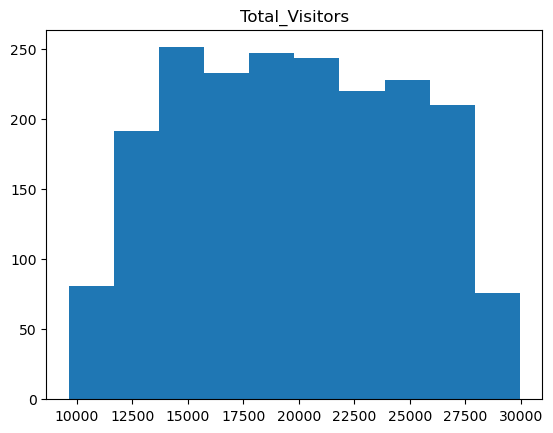

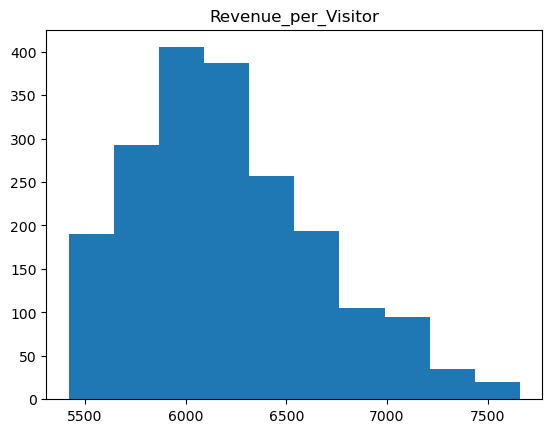

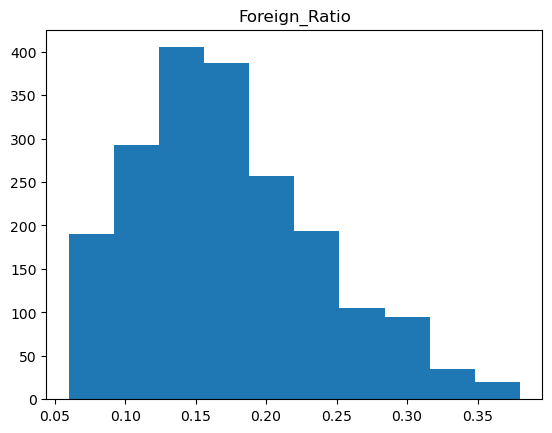

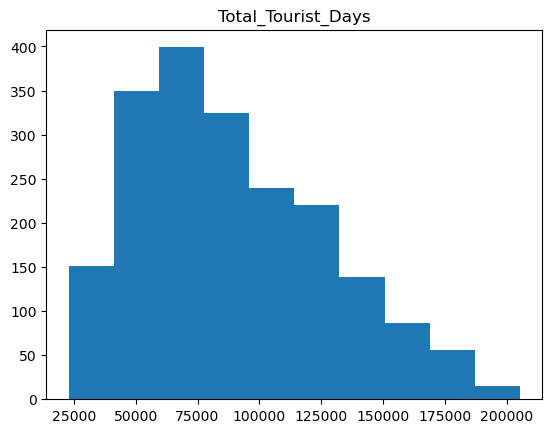

In [188]:
#making bell shaped 
import matplotlib.pyplot as plt 
for i in numaric.columns:
    plt.hist(numaric[i])
    plt.title(i)
    plt.show()#all they are are normulla distributed except year and 

In [194]:
# Z-score based outlier detection
def out_liears(column):
   mean=column.mean()
   std=column.std()
   z_score=(column/mean)/std
   return column[(z_score>3) | (z_score<-3)] 
print( out_liears(numaric["Total_Tourists"]))
print( out_liears(numaric["Total_Tourist_Days"]))
print( out_liears(numaric["Revenue_per_Visitor"]))

Series([], Name: Total_Tourists, dtype: int64)
Series([], Name: Total_Tourist_Days, dtype: float64)
Series([], Name: Revenue_per_Visitor, dtype: float64)


In [196]:
data=df[["Revenue_per_Visitor","Revenue_INR"]]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [198]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=10)
nn.fit(data)
d,i=nn.kneighbors(data)#d is distance and i is index numbers
print(d)
print(i)# for know the eps values

[[0.         0.00329397 0.01128045 ... 0.02753268 0.03095629 0.03582219]
 [0.         0.0088588  0.0129025  ... 0.01887152 0.0213401  0.02330758]
 [0.         0.00906129 0.01117622 ... 0.03395055 0.03613643 0.03847238]
 ...
 [0.         0.02156981 0.02235399 ... 0.04396502 0.04517873 0.04597168]
 [0.         0.0175719  0.02287572 ... 0.03705547 0.03729251 0.03902477]
 [0.         0.01517362 0.01905433 ... 0.04513635 0.0475489  0.04757793]]
[[   0 1163  280 ... 1646 1439 1332]
 [   1   43   22 ...  485  498  326]
 [   2 1348  154 ... 1383  946  351]
 ...
 [1977 1266 1097 ...  219 1789 1086]
 [1978  399    2 ... 1850 1626  431]
 [1979 1483  704 ...  882  758  400]]


In [200]:
type(df)

pandas.core.frame.DataFrame

**"We chose this because to know the expected value of EPS for DBSCAN."**


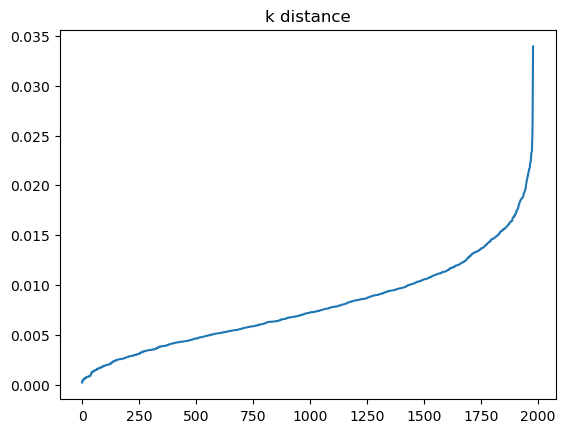

In [203]:

import numpy as np
d=d[:,1]
d=np.sort(d,axis=0)
plt.plot(d)
plt.title("k distance")
plt.show()

In [90]:
type(df)

pandas.core.frame.DataFrame

In [205]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan=DBSCAN(eps=0.012,min_samples=10)#eps=radius and min_simple = boarders how many points are in it is up to us how much
dbscan.fit(data)
labels=dbscan.labels_
print(labels)
print(np.unique(labels))
print(np.unique(labels,return_counts=True))

[-1 -1 -1 ... -1 -1 -1]
[-1  0]
(array([-1,  0], dtype=int64), array([1970,   10], dtype=int64))


In [92]:
type(df)

pandas.core.frame.DataFrame

In [207]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Month"]=encoder2.fit_transform(df["Month"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,0,Srinagar,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,0,Gulmarg,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,0,Pahalgam,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,0,Leh,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,0,Sonamarg,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,11,Anantnag,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,11,Baramulla,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,11,Rajouri,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,11,Budgam,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [94]:
type(df)

pandas.core.frame.DataFrame

In [209]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Destination"]=encoder2.fit_transform(df["Destination"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,0,14,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,Winter
1,2014,0,4,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,Winter
2,2014,0,10,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,Winter
3,2014,0,9,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,Winter
4,2014,0,13,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,11,0,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,Winter
1976,2024,11,1,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,Winter
1977,2024,11,12,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,Winter
1978,2024,11,2,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,Winter


In [211]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()#creating object
df["Season"]=encoder2.fit_transform(df["Season"])
df

,Year,Month,Destination,Domestic_Visitors,Foreign_Visitors,Revenue_INR,Avg_Stay_Days,Total_Tourists,Total_Visitors,Revenue_per_Visitor,Foreign_Ratio,Total_Tourist_Days,Season
0,2014,0,14,13266,4393,119046000,3.2,17659,17659,6741.378334,0.248768,56508.8,3
1,2014,0,4,21377,2235,133705000,3.6,23612,23612,5662.586820,0.094655,85003.2,3
2,2014,0,10,8755,1634,63383000,3.5,10389,10389,6100.972182,0.157282,36361.5,3
3,2014,0,9,20053,2704,132713000,3.2,22757,22757,5831.744079,0.118821,72822.4,3
4,2014,0,13,14880,2276,101712000,2.3,17156,17156,5928.654698,0.132665,39458.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,2024,11,0,21566,4338,159886000,5.5,25904,25904,6172.251390,0.167464,142472.0,3
1976,2024,11,1,18643,4419,146243000,6.0,23062,23062,6341.297372,0.191614,138372.0,3
1977,2024,11,12,9913,3643,93281000,3.4,13556,13556,6881.159634,0.268737,46090.4,3
1978,2024,11,2,9103,1721,66167000,4.0,10824,10824,6112.989653,0.158999,43296.0,3


In [96]:
type(df)

pandas.core.frame.DataFrame

**Separate features and target**

In [213]:
# Separate features and target
X = df.drop(['Revenue_INR'], axis=1)
y = df['Revenue_INR']

**Split into training and testing sets**

In [216]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(y_test)

215      88067000
161     105043000
135     108659000
386     155909000
674      85445000
          ...    
792     129312000
318     144293000
1902    162383000
621      95628000
1749    132801000
Name: Revenue_INR, Length: 396, dtype: int64


**Train the DecisionTreeRegressor**

In [219]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor(min_samples_split=5)
d.fit(x_train,y_train)
y_pred=d.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9970991221511588


**Cross-Validation Scores to check the overfitting in DecisionTreeRegressor**

In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Create model
model = DecisionTreeRegressor()

# Fit on full dataset (optional for cross_val_score, but good practice)
model.fit(X, y)

# Now use cross_val_score properly
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Average R²:", scores.mean())

Cross-validation scores: [0.99716894 0.99693393 0.99654066 0.9972554  0.99654086]
Average R²: 0.9968879601259429


**R2 Score Of DecisionTreeRegressor**

In [225]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

1180852.4831649833


In [227]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

2201274417070.0063


In [229]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9970991221511588


**Train the RandomForestRegressor**

In [232]:
from sklearn.ensemble import RandomForestRegressor#it is randomforest regressor
r= RandomForestRegressor(n_estimators=100)#how much modules works
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print(y_pred)

[8.7635800e+07 1.0426536e+08 1.0834443e+08 1.5613651e+08 8.5551310e+07
 8.5159440e+07 1.2317141e+08 1.0076471e+08 1.3818846e+08 1.4071101e+08
 1.2061639e+08 8.7311210e+07 1.0696187e+08 1.5981698e+08 1.1812480e+08
 1.1846536e+08 1.6148385e+08 1.2268787e+08 1.1501290e+08 1.1638921e+08
 1.1261529e+08 1.5894557e+08 1.0173215e+08 1.4046069e+08 1.0082759e+08
 1.7690245e+08 6.8531970e+07 9.9686170e+07 1.3008250e+08 1.3037862e+08
 1.1581300e+08 1.0054137e+08 9.7677220e+07 1.5284223e+08 8.7711700e+07
 1.6396153e+08 9.3086870e+07 9.4003820e+07 1.4835583e+08 1.6536864e+08
 1.4592981e+08 1.5386586e+08 1.4255291e+08 1.1591817e+08 8.1699360e+07
 1.3644253e+08 1.1162446e+08 1.0547793e+08 1.6111321e+08 1.5077685e+08
 1.2479456e+08 1.3687863e+08 8.4842170e+07 1.3852304e+08 1.2940622e+08
 1.4887867e+08 1.3747112e+08 1.1657248e+08 9.1767220e+07 1.2793442e+08
 1.7367186e+08 1.4095719e+08 1.0493305e+08 9.0928970e+07 1.3116777e+08
 1.3454365e+08 1.2629442e+08 7.5389190e+07 1.7632873e+08 1.0140926e+08
 1.046

**R2 Score Of  RandomForestRegressor**

In [235]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9993665440527516


**Train the KNeighborsRegressor**

In [238]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

**R2 Score Of KNeighborsRegressor**

In [241]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9728601952847001


**Cross-Validation Scores to check the overfitting in KNeighborsRegressor**

In [244]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Create model
model = KNeighborsRegressor()

# Fit on full dataset (optional for cross_val_score, but good practice)
model.fit(X, y)

# Now use cross_val_score properly
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Average R²:", scores.mean())

Cross-validation scores: [0.9692731  0.96963569 0.97092048 0.96848445 0.97303763]
Average R²: 0.9702702686445619


**"After comparing all the algorithms, we found that the KNeighborsRegressor is the best algorithm for our data."**

**"After comparing all the models, we found that there is no overfitting in any of our machine learning models**

**Decision Tree**: 60,016,030.0

**Random Forest**: 59,215,500.0

**K-Nearest Neighbors (KNN)**: 6,004,433.33



**Predict revenue for a custom input**


In [250]:
# You must match the input format exactly with the training data
sample_input = X.columns
empty_input = pd.DataFrame([np.zeros(len(sample_input))], columns=sample_input)
# Example: Set values manually (edit as needed)
empty_input.loc[0, 'Domestic_Visitors'] = 10000
empty_input.loc[0, 'Foreign_Visitors'] = 5000
empty_input.loc[0, 'Avg_Stay_Days'] = 3.5
empty_input.loc[0, 'Total_Tourists'] = 15000
# Set correct month and destination flags
empty_input.loc[0, 'Month'] = 1
empty_input.loc[0, 'Destination'] = 2
# Predict
predicted_revenue = knn.predict(empty_input)
print('Predicted Revenue (INR):', predicted_revenue[0])

Predicted Revenue (INR): 67862666.66666667
